In [53]:
import tensorflow as tf
import pandas as pd

from FeedBack import FeedBack
from window import WindowGenerator
import utils

# Autoregressive (AR) LSTM

## Dataset

In [54]:
case_1 = pd.read_csv("../datasets/case_1.csv", index_col='Time')
case_2 = pd.read_csv("../datasets/case_2.csv", index_col='Time')
case_3 = pd.read_csv("../datasets/case_3.csv", index_col='Time')
case_4 = pd.read_csv("../datasets/case_4.csv", index_col='Time')
case_5 = pd.read_csv("../datasets/case_5.csv", index_col='Time')

In [56]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets
feature_count = len(case_1.columns)

In [57]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

## Train case function

In [58]:
def train_case(case_df:pd.DataFrame, model:FeedBack, in_width:int, out_steps:int, max_epochs:int):
    """ Train model for given case df. """

    outlets = [ col for col in case_df.columns.values if col.startswith('outlet') ]
    column_indices = { name: i for i, name in enumerate(case_df.columns) }

    train_df, test_df, val_df = utils.train_test_val_split(case_df)
    # train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

    label_columns = outlets

    multi_window = WindowGenerator(
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        input_width=in_width,
        label_width=out_steps,
        shift=out_steps,
        # label_columns=label_columns
    )

    history = model.fit(
        multi_window.train,
        epochs=max_epochs,
        validation_data=multi_window.val,
        verbose=0
        # callbacks=[early_stopping]
    )

    return multi_window, history

## Model creation

In [59]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 20
features_size = len(label_columns)

In [60]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS, num_features=feature_count)

In [61]:
feedback_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

## Case 2

In [62]:
window, history = train_case(
    case_df=case_2,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

2022-09-26 17:50:04.000117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-26 17:50:09.266157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [63]:
feedback_model.build(input_shape=window.example[0].shape)
feedback_model.summary()

Model: "feed_back_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_cell_2 (LSTMCell)      multiple                  39040     
                                                                 
 rnn_2 (RNN)                 multiple                  39040     
                                                                 
 dense_2 (Dense)             multiple                  8976      
                                                                 
Total params: 48,016
Trainable params: 48,016
Non-trainable params: 0
_________________________________________________________________


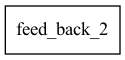

In [64]:
tf.keras.utils.plot_model(feedback_model, "../plots/models/feedback_model.png", show_shapes=True)

2022-09-26 17:50:40.970659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


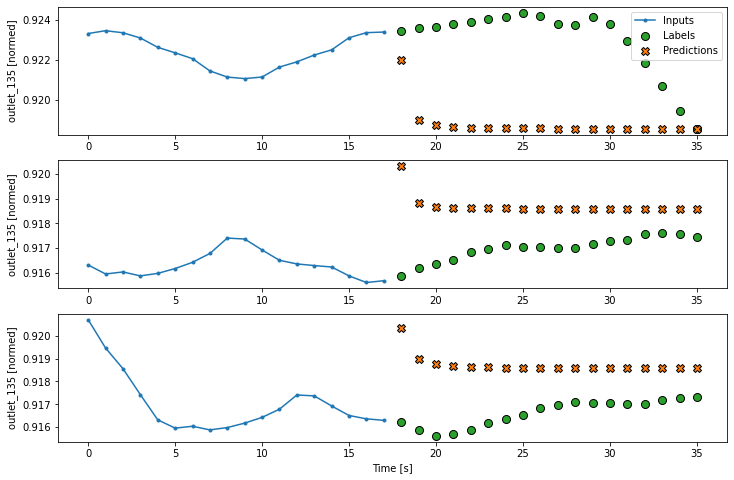

In [65]:
window.plot(feedback_model, plot_col="outlet_135")

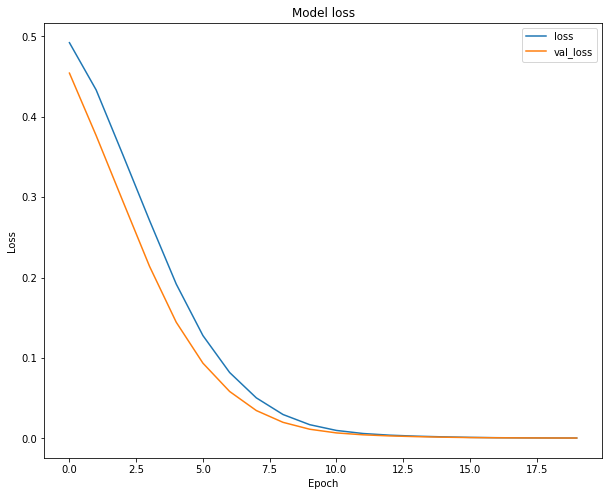

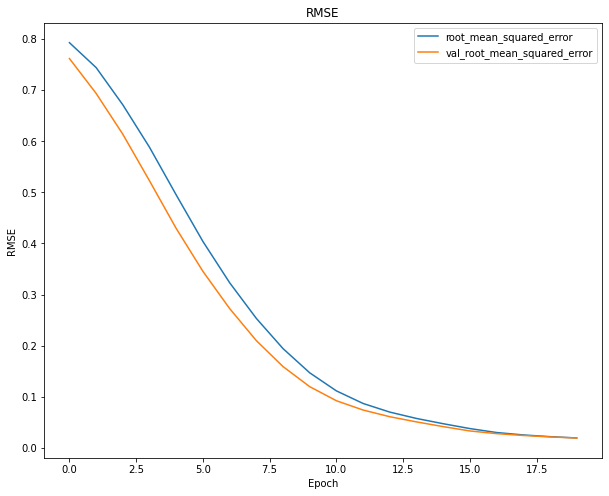

In [66]:
utils.plot_losses(history=history)

## Case 3

In [67]:
window, history = train_case(
    case_df=case_3,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

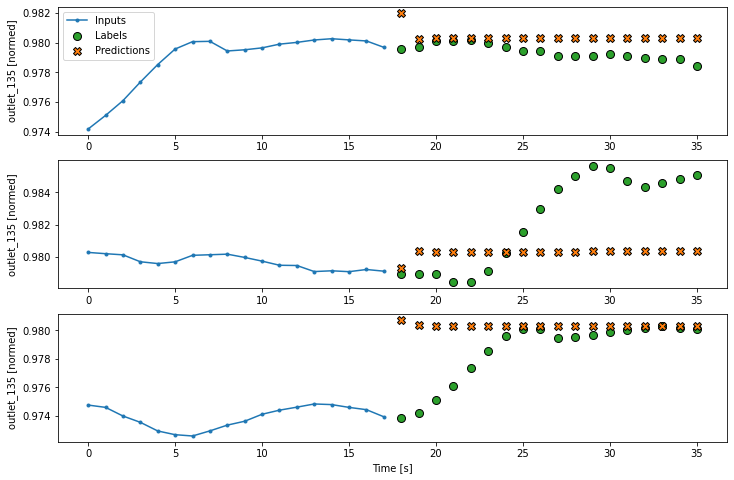

In [68]:
window.plot(feedback_model, plot_col="outlet_135")

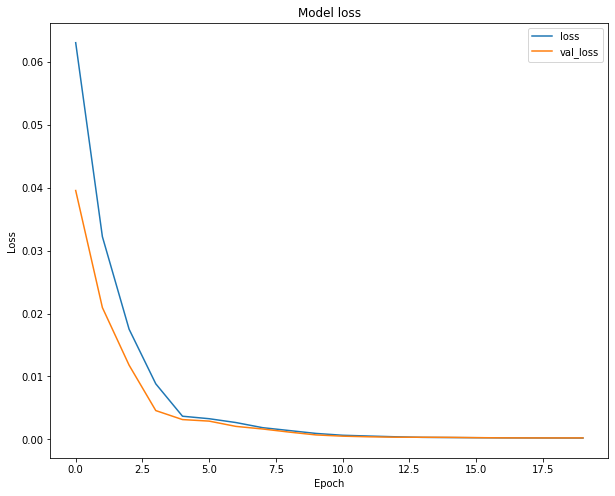

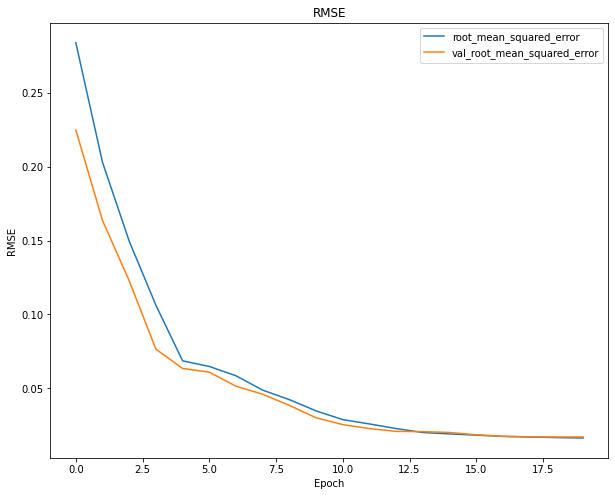

In [69]:
utils.plot_losses(history=history)

## Case 4

In [70]:
window, history = train_case(
    case_df=case_4,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

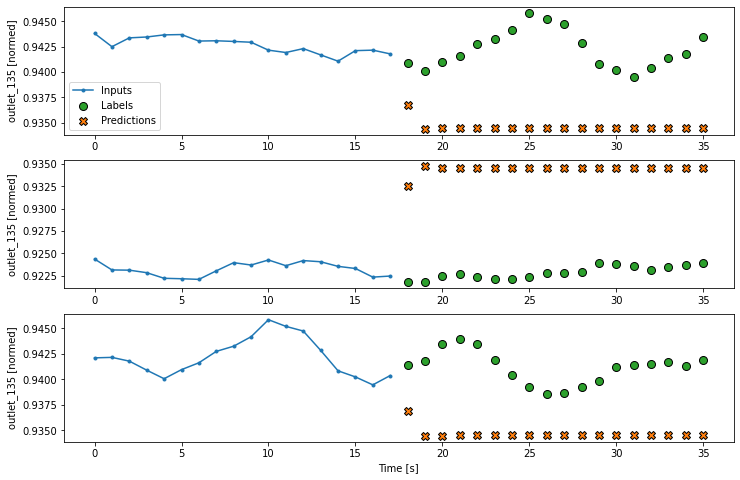

In [71]:
window.plot(feedback_model, plot_col="outlet_135")

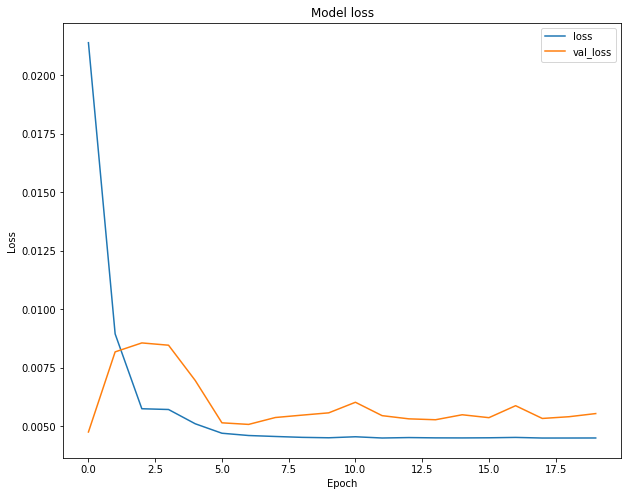

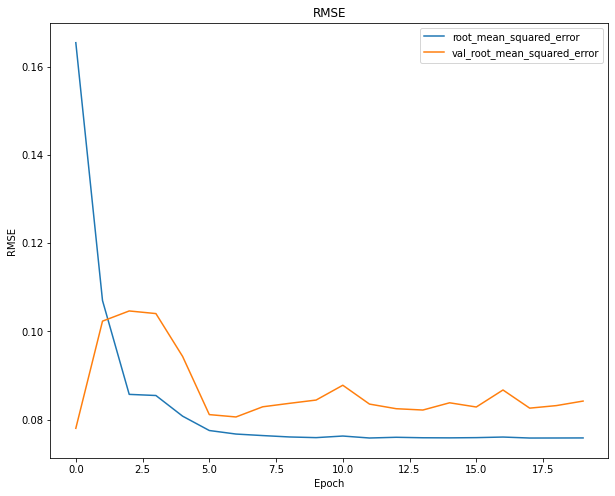

In [72]:
utils.plot_losses(history=history)

## Case 5

In [73]:
window, history = train_case(
    case_df=case_5,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

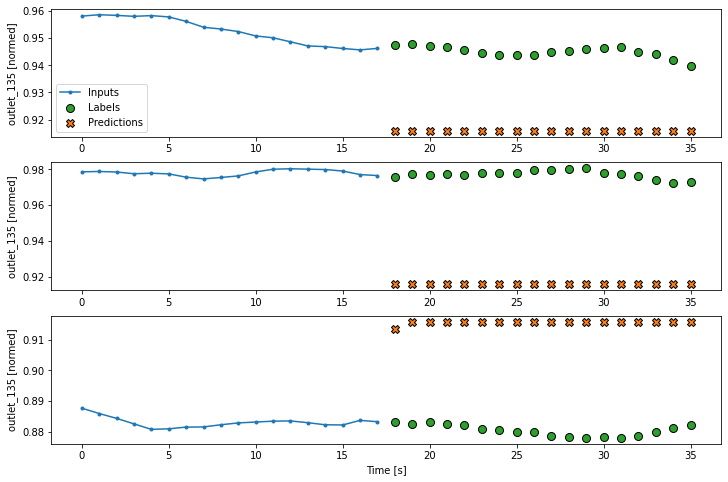

In [74]:
window.plot(feedback_model, plot_col="outlet_135")

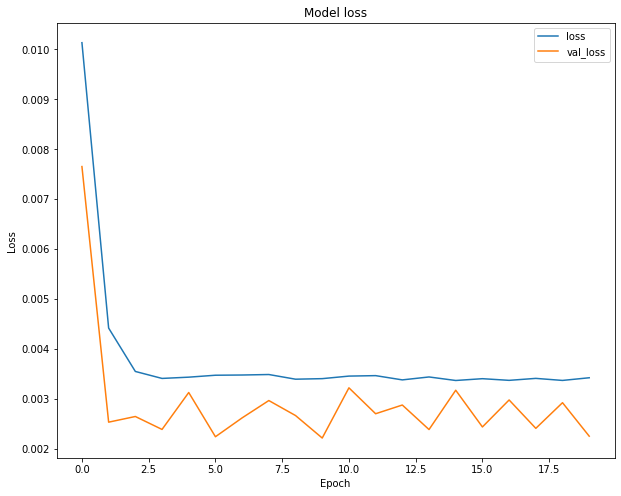

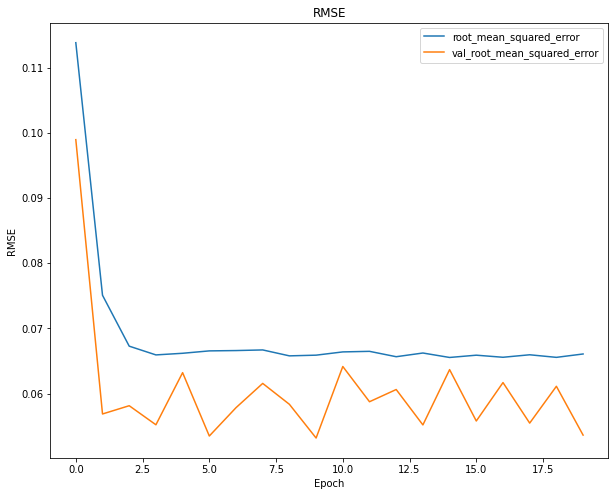

In [75]:
utils.plot_losses(history=history)

## Case 1 (Testing)

In [76]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
column_indices = { name: i for i, name in enumerate(case_1.columns) }

label_columns = outlets

window = WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    # label_columns=label_columns
)

feedback_model.evaluate(window.train) # Testing

5/5 [==============================] - 1s 132ms/step - loss: 0.0331 - root_mean_squared_error: 0.2058


[0.03313453868031502, 0.2057662457227707]